In [ ]:
# !pip install pytorch-tabnet

In [ ]:
# !pip install tab-transformer-pytorch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gc
import os
import sys

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [3]:
rna_luad_xena = pd.read_csv(os.path.join('Z:\multiomics based manuscript\datasets\gene_exp\with_common_patients_processed', 'csv_rna_common_luad.csv'))
rna_lusc_xena = pd.read_csv(os.path.join('Z:\multiomics based manuscript\datasets\gene_exp\with_common_patients_processed', 'csv_rna_common_lusc.csv'))

rna_luad_xena['label'] = 1
rna_lusc_xena['label'] = 0
df_rna_xena = pd.concat([rna_luad_xena, rna_lusc_xena], axis=0)

# cnv_luad_xena = pd.read_csv(os.path.join('Z:\multiomics based manuscript\datasets\cnv\with_common_patients_processed', 'csv_cnv_common_luad.csv'))
# cnv_lusc_xena = pd.read_csv(os.path.join('Z:\multiomics based manuscript\datasets\cnv\with_common_patients_processed', 'csv_cnv_common_lusc.csv'))

# cnv_luad_xena['label'] = 1
# cnv_lusc_xena['label'] = 0
# df_cnv_xena = pd.concat([cnv_luad_xena, cnv_lusc_xena], axis=0)

In [4]:
imp_genes = [
    'label',
    'ABCC5',
    'ABCF3',
    'ACAP2',
    'ACTL6A',
    'AP2M1',
    'ATP11B',
    'CLDN1',
    'COL7A1',
    'DCUN1D1',
    'DLG1',
    'DVL3',
    'FAM43A',
    'FBXO45',
    'FXR1',
    'FYTTD1',
    'GMPS',
    'KPNA4',
    'LRRC31',
    'LSG1',
    'MED12L',
    'MYNN',
    'OPA1',
    'P2RY1',
    'PAK2',
    'PARL',
    'PCYT1A',
    'PDCD10',
    'PIGX',
    'PIK3CA',
    'PLCH1',
    'PLD1',
    'PSMD2',
    'RFC4',
    'RNF168',
    'RSRC1',
    'SEMA3F',
    'SENP5',
    'SIAH2',
    'SOX2',
    'TBCCD1',
    'TFRC',
    'TP63',
    'TRA2B',
    'UCN2',
    'WDR53',
    'YEATS2',
    'ZNF639',
]

In [5]:
df_selected = df_rna_xena[imp_genes]

In [6]:
df_adc = df_selected[df_selected['label'] == 1]  ## df_control
df_scc = df_selected[df_selected['label'] == 0]  ## df_treatment


In [7]:
df_adc

,label,ABCC5,ABCF3,ACAP2,ACTL6A,AP2M1,ATP11B,CLDN1,COL7A1,DCUN1D1,...,SIAH2,SOX2,TBCCD1,TFRC,TP63,TRA2B,UCN2,WDR53,YEATS2,ZNF639
0,1,9.7909,9.9862,8.6827,9.3124,12.2283,9.2492,10.2323,7.8752,6.7540,...,8.8656,7.8976,7.4471,10.0772,5.1322,10.6246,2.6420,6.8423,9.3966,8.5046
1,1,10.0405,10.7969,9.1608,10.1203,12.3839,10.1794,10.7543,12.8499,8.6712,...,9.5176,5.2414,7.9184,12.0377,9.3054,11.3466,7.5124,7.5165,10.1665,9.4165
2,1,9.7083,9.9959,9.7851,9.8175,12.4932,10.3661,10.5512,6.6390,8.8306,...,9.0498,10.0621,8.3362,11.5264,8.1869,10.8419,2.1192,7.0135,9.6392,8.9925
3,1,10.1034,10.5017,10.1228,9.9321,13.1130,10.6412,8.0090,8.5374,8.7133,...,9.3150,6.3339,7.6283,11.5254,6.9294,11.1725,3.7555,7.1525,10.5612,9.1389
4,1,9.3401,10.4215,10.7511,10.8872,13.2057,10.9682,11.4955,6.7004,9.6678,...,9.5517,7.3519,7.9009,11.0505,7.0244,11.2522,1.1136,7.8103,10.4749,10.1649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,1,10.1302,10.1527,9.7378,9.7187,12.8823,9.3708,9.4376,7.9863,8.6160,...,9.2670,1.8168,7.6011,10.2061,5.2267,10.8036,3.0512,6.5600,10.5184,8.6697
501,1,10.2728,10.5724,10.6624,10.0892,12.9658,10.6240,9.2523,7.0163,9.4108,...,9.3420,4.9706,8.3627,11.2202,5.5333,11.3497,0.5260,7.5975,10.8463,9.1841
502,1,9.9206,10.3551,9.8459,9.6796,12.7685,10.6238,11.5807,11.7780,9.0146,...,9.5221,7.6745,8.2134,12.5134,6.5742,11.0991,5.5892,6.9073,10.2297,8.9964
503,1,8.5436,9.9496,9.6937,9.9084,12.0153,9.9948,10.4625,4.6602,7.8783,...,9.2295,2.7472,7.5336,10.5917,4.4873,10.4610,1.9475,7.0645,9.6065,8.6905


In [8]:
df_scc

,label,ABCC5,ABCF3,ACAP2,ACTL6A,AP2M1,ATP11B,CLDN1,COL7A1,DCUN1D1,...,SIAH2,SOX2,TBCCD1,TFRC,TP63,TRA2B,UCN2,WDR53,YEATS2,ZNF639
0,0,10.6381,10.2252,9.9997,10.4598,13.2499,10.6765,13.2387,10.7179,9.0348,...,10.1385,9.4352,8.3510,11.3363,11.7479,11.1893,3.9787,7.4718,9.7795,9.0458
1,0,10.7292,11.3821,12.1278,11.7398,13.6575,11.3243,15.1870,14.3715,9.3360,...,10.6721,11.4700,9.5251,15.6176,12.8979,12.4149,6.7114,8.6321,11.7956,10.3682
2,0,9.6228,10.4362,10.5849,12.3227,12.9663,10.1586,7.9561,7.2849,10.1244,...,10.2021,9.6337,9.7405,12.8820,7.9626,12.3600,1.0823,8.4451,11.1537,10.1079
3,0,14.8772,12.8454,11.7617,12.9446,15.1254,13.5452,10.9757,12.8761,11.9235,...,10.8401,13.7710,9.0795,13.4225,13.9210,11.9537,5.9688,8.3832,13.4411,11.4514
4,0,13.2852,11.6005,11.9286,12.1215,14.6583,12.0346,12.4557,12.6320,10.3242,...,11.6264,12.0165,9.8598,14.5698,15.2625,12.6526,6.4612,9.4273,12.0450,10.6951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,0,12.5023,11.2342,11.1047,11.1657,13.8801,11.6737,14.1630,13.6875,10.7165,...,10.2355,11.3112,8.7919,14.6023,13.8931,11.7657,6.6998,8.3369,11.7293,10.0594
479,0,14.1503,11.2708,12.7141,12.9200,14.4380,12.3726,14.9810,10.1875,11.4485,...,12.3687,11.4610,10.3258,14.7515,13.9693,12.2003,3.4818,9.3401,11.0572,10.8249
480,0,13.5501,11.3037,11.8088,11.4937,13.6029,12.1701,12.1874,13.1856,11.0294,...,11.6626,13.4480,9.0864,13.6416,14.1314,12.2106,8.1273,8.5527,11.3527,10.9198
481,0,10.1005,10.1580,11.0727,11.6384,13.2681,10.6215,14.1737,11.5359,10.2188,...,9.5662,7.7543,9.6088,14.3805,12.2836,11.7581,6.4965,8.3353,10.5471,9.9667


In [9]:
df_adc.drop(columns=['label'], inplace=True)
df_scc.drop(columns=['label'], inplace=True)

In [10]:
# log2fc = []
# p_values = []

In [11]:
imp_genes.remove('label')

In [12]:
from scipy.stats import ttest_ind


mean_control = df_adc.mean()
mean_treatment = df_scc.mean()
fc = mean_treatment/mean_control
log2fc = np.log2(fc)  # log2FC calculation
fc = fc

# Perform t-test to calculate p-value
t_stat, p_val = ttest_ind(df_adc, df_scc)  # Two-sample t-test
p_values = p_val

# Create a DataFrame for log2FC and p-values
df_results = pd.DataFrame({
    'Gene': imp_genes,
    'log2FC': log2fc,
    'p_value': p_values,
    'fc':fc
})

# Convert p-values to -log10(p-value) for volcano plot
df_results['-log10(p_value)'] = -np.log10(df_results['p_value'])

# View results
print(df_results.head())

          Gene    log2FC        p_value        fc  -log10(p_value)
ABCC5    ABCC5  0.324305  9.363146e-155  1.252061       154.028578
ABCF3    ABCF3  0.131180  2.269172e-129  1.095189       128.644133
ACAP2    ACAP2  0.176205  1.685642e-137  1.129908       136.773235
ACTL6A  ACTL6A  0.183319  6.476635e-137  1.135493       136.188651
AP2M1    AP2M1  0.138917  8.175293e-171  1.101078       170.087497


In [13]:
df_results

,Gene,log2FC,p_value,fc,-log10(p_value)
ABCC5,ABCC5,0.324305,9.363146e-155,1.252061,154.028578
ABCF3,ABCF3,0.131180,2.269172e-129,1.095189,128.644133
ACAP2,ACAP2,0.176205,1.685642e-137,1.129908,136.773235
ACTL6A,ACTL6A,0.183319,6.476635e-137,1.135493,136.188651
AP2M1,AP2M1,0.138917,8.175293e-171,1.101078,170.087497
ATP11B,ATP11B,0.185799,3.144175e-131,1.137447,130.502493
CLDN1,CLDN1,0.338831,9.824871e-97,1.264731,96.007673
COL7A1,COL7A1,0.683796,3.864060e-151,1.606361,150.412956
DCUN1D1,DCUN1D1,0.199556,1.698588e-118,1.148345,117.769912
DLG1,DLG1,0.169273,2.473951e-157,1.124491,156.606609


In [14]:
df_results.columns

Index(['Gene', 'log2FC', 'p_value', 'fc', '-log10(p_value)'], dtype='object')

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
sns.set(style="whitegrid", font_scale=1.2)


In [17]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Set plot style
# sns.set(style="whitegrid", font_scale=1.2)

# plt.figure(figsize=(8, 6))

# # Plot the volcano plot
# sns.scatterplot(data=df_results, x='log2FC', y='-log10(p_value)', color='gray', alpha=0.7)

# # Highlight significant genes (adjust thresholds as needed)
# threshold_fc = 0  # Example threshold for log2FC (genes with |log2FC| > 0   or fc > 1)
# threshold_pval = 0.05  # Example threshold for p-value (genes with p-value < 0.05)

# # Highlight genes that are significantly different (based on both log2FC and p-value thresholds)
# significant_genes = df_results[(df_results['log2FC'] > threshold_fc) & (df_results['p_value'] < threshold_pval)]

# # Plot significant genes in red
# sns.scatterplot(data=significant_genes, x='log2FC', y='-log10(p_value)', color='red', s=50, label='Upregulated Genes')

# # Add labels to significant genes (optional)
# for i, row in df_results.iterrows():
#     plt.text(row['log2FC'], row['-log10(p_value)'] + 0.8, row['Gene'], horizontalalignment='center', fontsize=10)

# # Add vertical and horizontal lines to indicate thresholds
# plt.axhline(-np.log10(threshold_pval), color='blue', linestyle='dashed', linewidth=1, label='p = 0.05')
# plt.axvline(threshold_fc, color='green', linestyle='dashed', linewidth=1, label='log2FC = 0.0')
# plt.axvline(-threshold_fc, color='green', linestyle='dashed', linewidth=1)

# # Labels and title
# plt.xlabel("log2 Fold Change")
# plt.ylabel("-log10(p-value)")
# plt.title("Volcano Plot of the Discovered Genes", fontsize=16, weight='bold')

# # Display the legend
# plt.legend()

# # Adjust layout for better presentation
# plt.tight_layout()

# # Save the plot as a high-resolution PDF
# plt.savefig("volcano_plot.pdf", dpi=600, format='pdf')

# # Show the plot
# plt.show()

# print("Volcano plot saved as 'volcano_plot.pdf' with 600 DPI.")


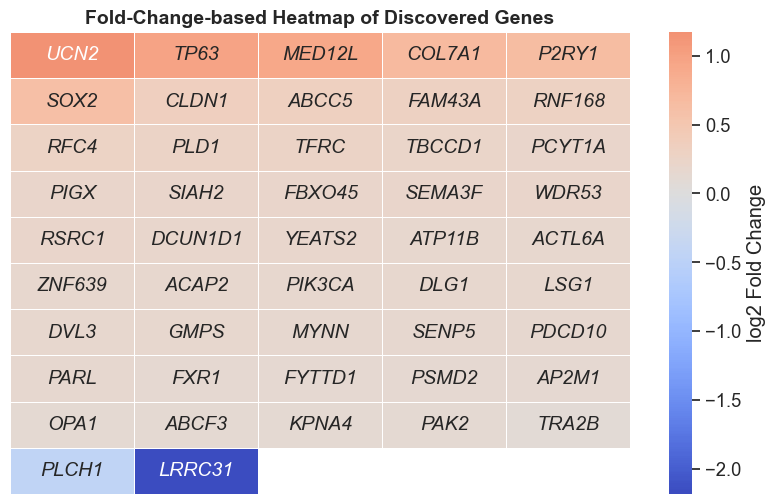

Heatmap saved as 'gene_heatmap.pdf' with 600 DPI.


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Select only the 47 genes for heatmap
subset_of_47_genes = df_results[df_results['Gene'].isin(imp_genes)].copy()

# Sort genes based on log2FC (optional, for better visualization)
subset_of_47_genes = subset_of_47_genes.sort_values(by="log2FC", ascending=False)

# Define grid size (10 rows x 5 columns)
num_rows = 10
num_cols = 5

# Pad with NaN if needed to fit exactly in a 10x5 table
while len(subset_of_47_genes) < num_rows * num_cols:
    empty_row = pd.DataFrame({'Gene': [np.nan], 'log2FC': [np.nan]})  # Create a new row
    subset_of_47_genes = pd.concat([subset_of_47_genes, empty_row], ignore_index=True)  # Use concat instead of append

# Reshape into a 10x5 array
gene_matrix = np.array(subset_of_47_genes['log2FC']).reshape(num_rows, num_cols)
gene_names = np.array(subset_of_47_genes['Gene']).reshape(num_rows, num_cols)

# Create a heatmap
plt.figure(figsize=(10, 6))
ax = sns.heatmap(gene_matrix, annot=gene_names, cmap="coolwarm", fmt="", linewidths=0.5, 
                 cbar_kws={'label': 'log2 Fold Change'}, center=0, annot_kws={"fontsize": 14, "style": "italic"})

# Remove x-ticks and y-ticks
ax.set_xticks([])
ax.set_yticks([])

# Set title
plt.title("Fold-Change-based Heatmap of Discovered Genes", fontsize=14, weight='bold')

# Save high-resolution heatmap
plt.savefig("gene_heatmap.png", dpi=600, format='png')

# Show plot
plt.show()

print("Heatmap saved as 'gene_heatmap.pdf' with 600 DPI.")


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only the 47 genes for heatmap
selected_genes = df_results[['Gene','log2FC']]

In [23]:
# Sort genes based on log2FC (optional, for better visualization)
selected_genes = selected_genes.sort_values(by="log2FC", ascending=False)

In [24]:
selected_genes

,Gene,log2FC
UCN2,UCN2,1.172772
TP63,TP63,0.976532
MED12L,MED12L,0.926409
COL7A1,COL7A1,0.683796
P2RY1,P2RY1,0.657971
SOX2,SOX2,0.621543
CLDN1,CLDN1,0.338831
ABCC5,ABCC5,0.324305
FAM43A,FAM43A,0.316600
RNF168,RNF168,0.299019


In [25]:
# Arrange into a 10x5 grid (pad with NaN if needed)
num_rows = 10
num_cols = 5

# Pad with NaN if needed to fit exactly in a 10x5 table
while len(selected_genes) < num_rows * num_cols:
    selected_genes = selected_genes.append({'Gene': np.nan, 'log2FC': np.nan}, ignore_index=True)

# Reshape into a 10x5 array
gene_matrix = np.array(selected_genes['log2FC']).reshape(num_rows, num_cols)
gene_names = np.array(selected_genes['Gene']).reshape(num_rows, num_cols)

# Create a heatmap
plt.figure(figsize=(10, 6))
ax = sns.heatmap(gene_matrix, annot=gene_names, cmap="coolwarm", fmt="", linewidths=0.5, 
                 cbar_kws={'label': 'log2 Fold Change'}, center=0)

# Set title
plt.title("Heatmap of Selected Gene log2FC", fontsize=14, weight='bold')

# Save high-resolution heatmap
plt.savefig("gene_heatmap.pdf", dpi=600, format='pdf')

# Show plot
plt.show()

print("Heatmap saved as 'gene_heatmap.pdf' with 600 DPI.")

AttributeError: 'DataFrame' object has no attribute 'append'